# GakxAI - Using Natural Language Processing and Tensorflow

In this Jupyter Notebook, We are going to Build a Chatbot that Understands the Context of Sentense and Respond accordingly.
These are the Things that we are going to do in this Project -
1. Transforming the Conversational Intents into Tensorflow model (Neural Network using TFLEARN) using NLP and Save it as Pickle also.
2. Load the Same Pickle and Model to Build the Framework to Process the Responses.
3. At Last, We Show How the Inputs are Processed and Give the Reponses.



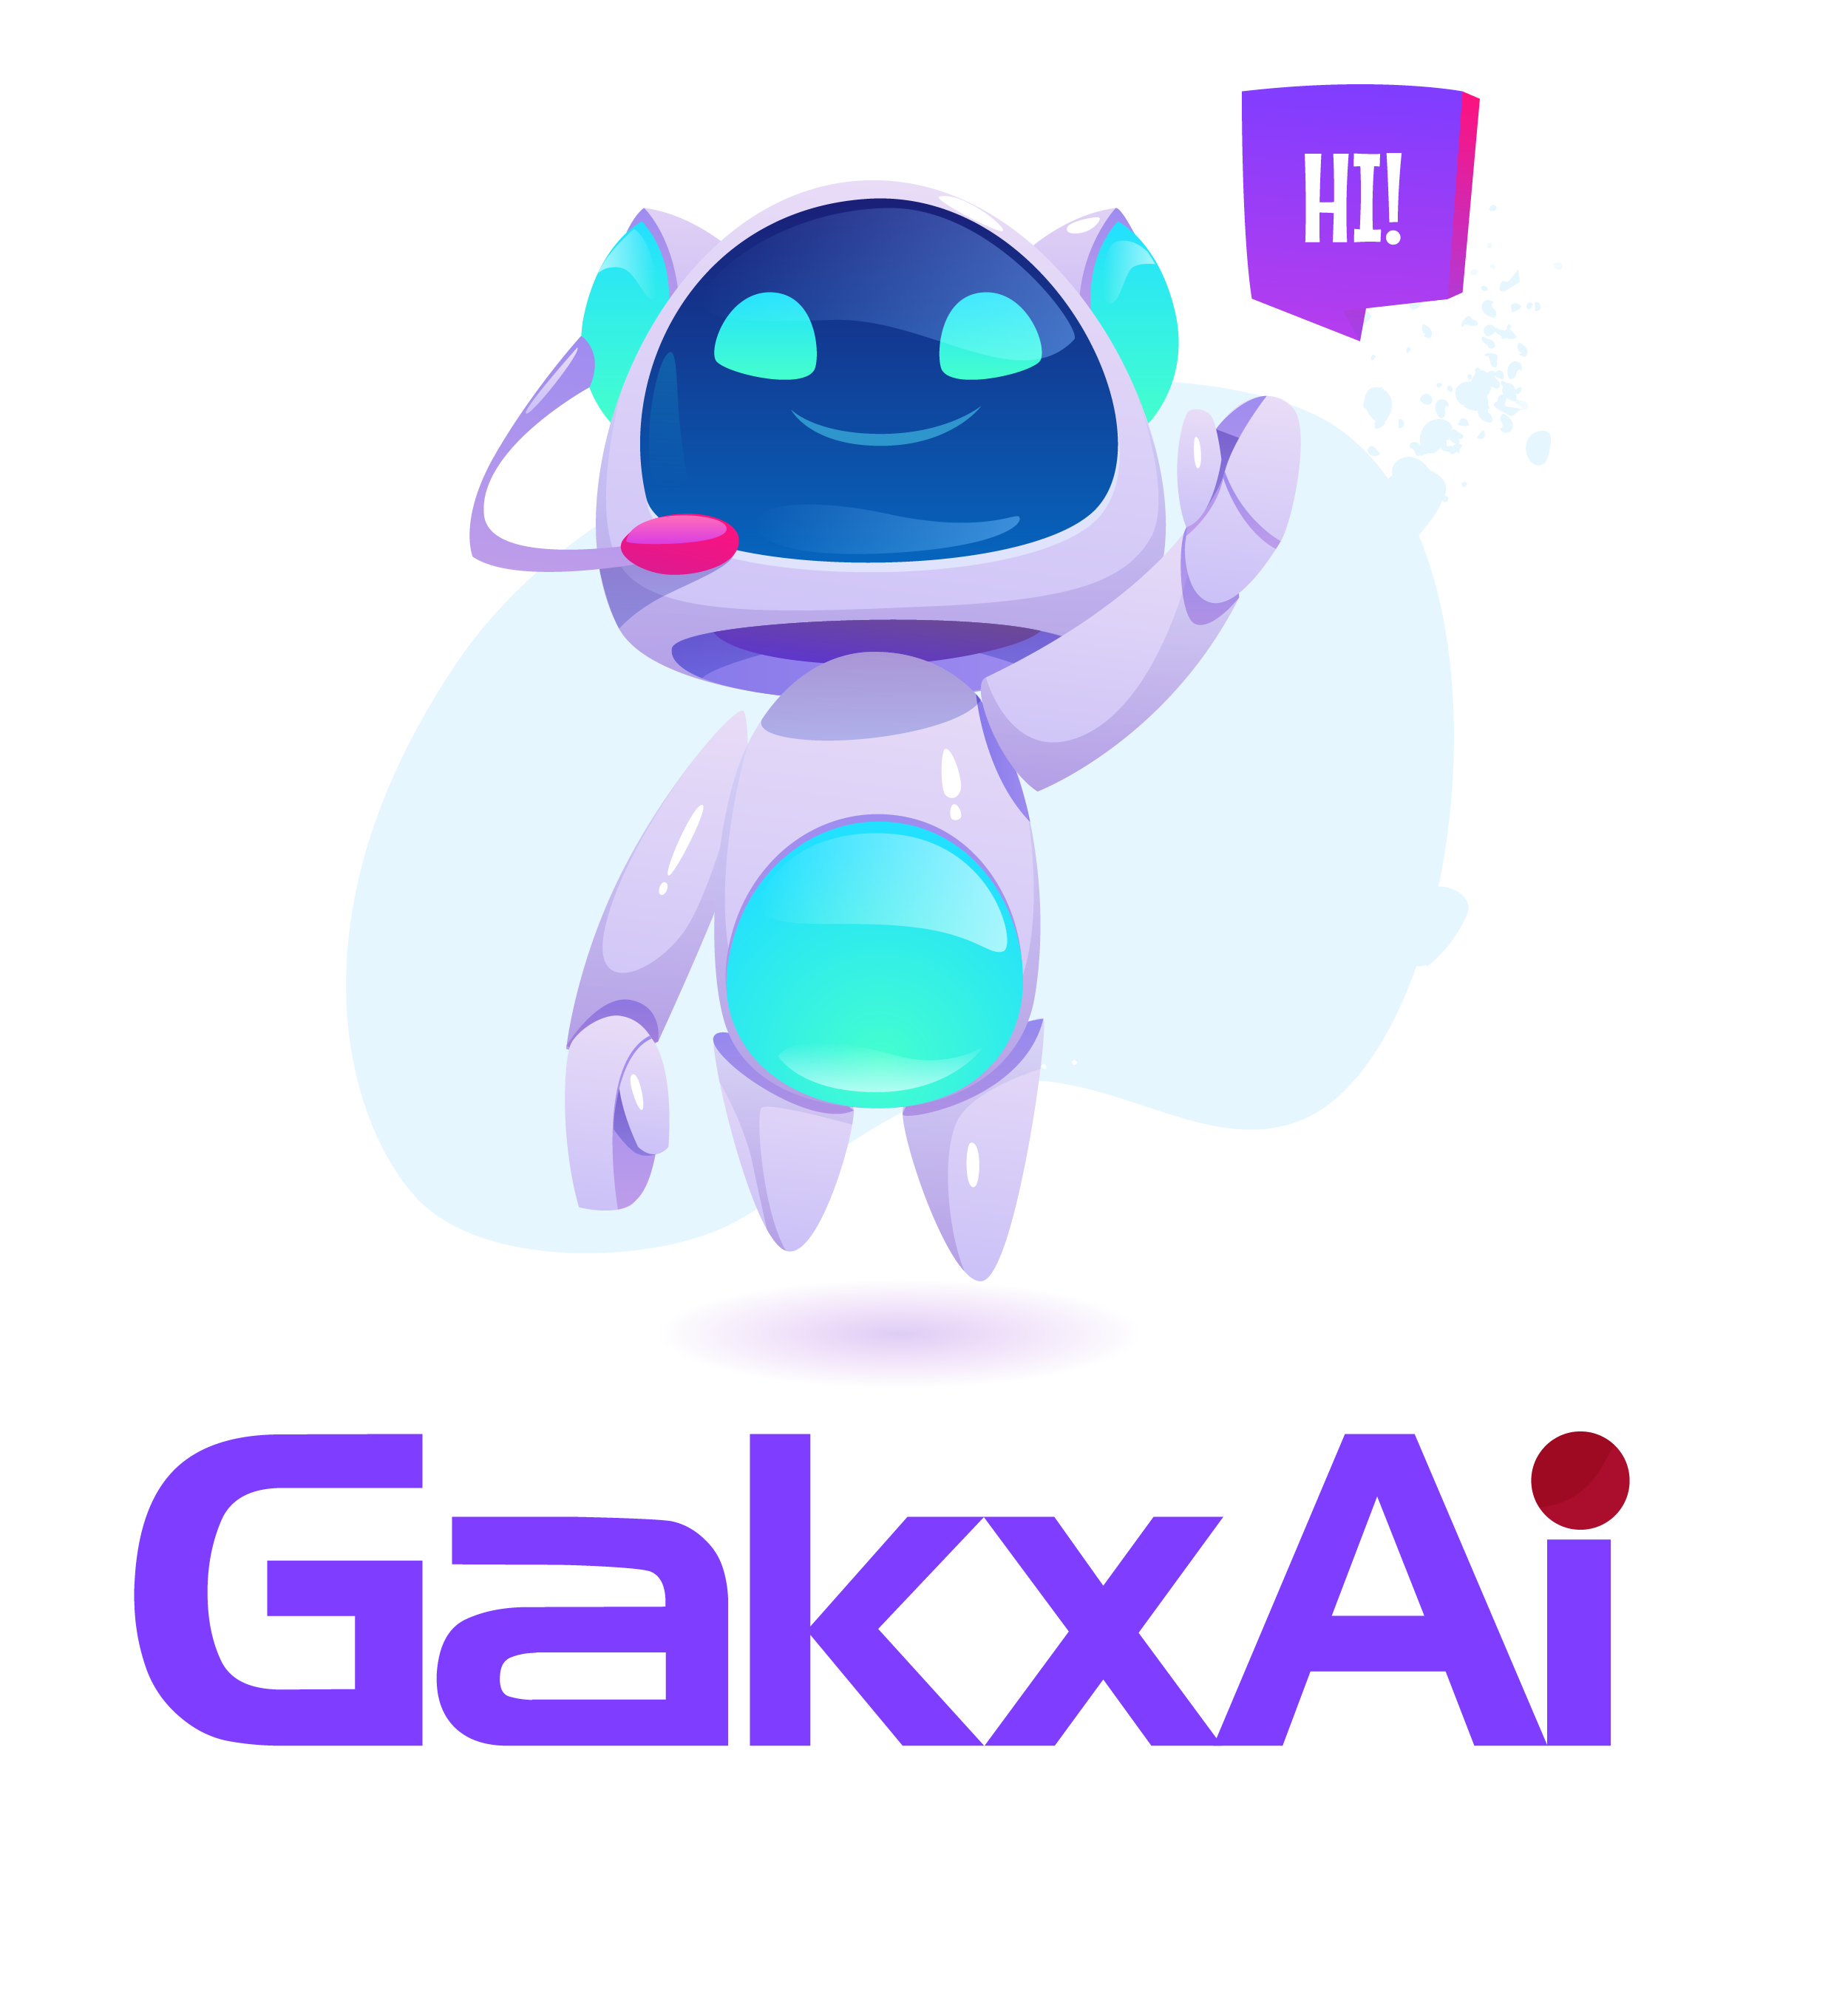

In [4]:
from IPython.core.display import Image, display
display(Image('/content/gakxai (1).png', width=400))

In [5]:
pip install tflearn 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.3/107.3 KB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for tflearn: filename=tflearn-0.5.0-py3-none-any.whl size=127299 sha256=87ca1fdcc6d5690e1adb498351b90accf6a5a0f6b2c8c15936160b0afff3353b
  Stored in directory: /root/.cache/pip/wheels/65/9b/15/cb1e6b279c14ed897530d15cfd7da8e3df8a947e593f5cfe59
Successfully built tflearn


# **Import Libraries**

In [6]:
import numpy as np
import tensorflow as tf
import tflearn
import random

import nltk
from nltk.stem.lancaster import LancasterStemmer
stemmer = LancasterStemmer()

import json
import pickle
import warnings
warnings.filterwarnings("ignore")

Instructions for updating:
non-resource variables are not supported in the long term


In [7]:
print("Processing the Intents.....")
with open('intents.json') as json_data:
    intents = json.load(json_data)

Processing the Intents.....


In [8]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [9]:
words = []
classes = []
documents = []
ignore_words = ['?']
print("Looping through the Intents to Convert them to words, classes, documents and ignore_words.......")
for intent in intents['intents']:
    for pattern in intent['patterns']:
        # tokenize each word in the sentence
        w = nltk.word_tokenize(pattern)
        # add to our words list
        words.extend(w)
        # add to documents in our corpus
        documents.append((w, intent['tag']))
        # add to our classes list
        if intent['tag'] not in classes:
            classes.append(intent['tag'])

Looping through the Intents to Convert them to words, classes, documents and ignore_words.......


In [10]:
print("Stemming, Lowering and Removing Duplicates.......")
words = [stemmer.stem(w.lower()) for w in words if w not in ignore_words]
words = sorted(list(set(words)))

# remove duplicates
classes = sorted(list(set(classes)))

print (len(documents), "documents")
print (len(classes), "classes", classes)
print (len(words), "unique stemmed words", words)

Stemming, Lowering and Removing Duplicates.......
73 documents
23 classes ['Module', 'Studying Monday', 'Studying sunday', 'Studying thursday', 'Studying tuesday', 'Studying wednesday', 'TP', 'TP2', 'asking', 'deadline', 'goodbye', 'great', 'greeting', 'help', 'homework', 'hours', 'hoursmorning', 'interro OCO', 'interro productique', 'motivation', 'rental', 'thanks', 'today']
88 unique stemmed words ["'d", "'s", 'a', 'aav', 'am', 'any', 'anyon', 'ar', 'arwaaah', 'automat', 'avancé', 'backstep', 'bye', 'ca', 'can', 'cant', 'cv', 'day', 'deadlin', 'do', 'doe', 'doing', 'end', 'fin', 'for', 'forward', 'gakxa', 'going', 'good', 'goodby', 'hat', 'hav', 'hello', 'help', 'hi', 'homework', 'hour', 'how', 'i', 'is', 'lat', 'lik', 'me', 'monday', 'mop', 'mot', "n't", 'near', 'nee', 'now', 'oco', 'on', 'press', 'product', 'reg', 'rent', 'right', 'rpi', 'sah', 'see', 'start', 'study', 'sunday', 'test', 'than', 'thank', 'that', 'the', 'ther', 'thi', 'thursday', 'to', 'today', 'tommorow', 'tomorrow'

In [11]:
print("Creating the Data for our Model.....")
training = []
output = []
print("Creating an List (Empty) for Output.....")
output_empty = [0] * len(classes)

print("Creating Traning Set, Bag of Words for our Model....")
for doc in documents:
    # initialize our bag of words
    bag = []
    # list of tokenized words for the pattern
    pattern_words = doc[0]
    # stem each word
    pattern_words = [stemmer.stem(word.lower()) for word in pattern_words]
    # create our bag of words array
    for w in words:
        bag.append(1) if w in pattern_words else bag.append(0)

    # output is a '0' for each tag and '1' for current tag
    output_row = list(output_empty)
    output_row[classes.index(doc[1])] = 1

    training.append([bag, output_row])

Creating the Data for our Model.....
Creating an List (Empty) for Output.....
Creating Traning Set, Bag of Words for our Model....


In [12]:
from tensorflow.python.framework import ops

In [13]:
print("Shuffling Randomly and Converting into Numpy Array for Faster Processing......")
random.shuffle(training)
training = np.array(training)

print("Creating Train and Test Lists.....")
train_x = list(training[:,0])
train_y = list(training[:,1])
print("Building Neural Network for Out Chatbot to be Contextual....")
print("Resetting graph data....")
ops.reset_default_graph()

Shuffling Randomly and Converting into Numpy Array for Faster Processing......
Creating Train and Test Lists.....
Building Neural Network for Out Chatbot to be Contextual....
Resetting graph data....


In [14]:
net = tflearn.input_data(shape=[None, len(train_x[0])])
net = tflearn.fully_connected(net, 8)
net = tflearn.fully_connected(net, 8)
net = tflearn.fully_connected(net, len(train_y[0]), activation='softmax')
net = tflearn.regression(net)
print("Training....")

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Training....


In [15]:
model = tflearn.DNN(net, tensorboard_dir='tflearn_logs')

In [16]:
print("Training the Model.......")
model.fit(train_x, train_y, n_epoch=1000, batch_size=8, show_metric=True)
print("Saving the Model.......")
model.save('model.tflearn')

Training Step: 9999  | total loss: 0.06074 | time: 0.028s
| Adam | epoch: 1000 | loss: 0.06074 - acc: 0.9271 -- iter: 72/73
Training Step: 10000  | total loss: 0.05483 | time: 0.031s
| Adam | epoch: 1000 | loss: 0.05483 - acc: 0.9344 -- iter: 73/73
--
Saving the Model.......


In [17]:
print("Pickle is also Saved..........")
pickle.dump( {'words':words, 'classes':classes, 'train_x':train_x, 'train_y':train_y}, open( "training_data", "wb" ) )

Pickle is also Saved..........


In [18]:
print("Loading Pickle.....")
data = pickle.load( open( "training_data", "rb" ) )
words = data['words']
classes = data['classes']
train_x = data['train_x']
train_y = data['train_y']


with open('intents.json') as json_data:
    intents = json.load(json_data)
    
print("Loading the Model......")
# load our saved model
model.load('./model.tflearn')

Loading Pickle.....
Loading the Model......


In [19]:
def clean_up_sentence(sentence):
    # It Tokenize or Break it into the constituents parts of Sentense.
    sentence_words = nltk.word_tokenize(sentence)
    # Stemming means to find the root of the word.
    sentence_words = [stemmer.stem(word.lower()) for word in sentence_words]
    return sentence_words

# Return the Array of Bag of Words: True or False and 0 or 1 for each word of bag that exists in the Sentence
def bow(sentence, words, show_details=False):
    sentence_words = clean_up_sentence(sentence)
    bag = [0]*len(words)
    for s in sentence_words:
        for i,w in enumerate(words):
            if w == s:
                bag[i] = 1
                if show_details:
                    print ("found in bag: %s" % w)
    return(np.array(bag))

ERROR_THRESHOLD = 0.25
print("ERROR_THRESHOLD = 0.25")

def classify(sentence):
    # Prediction or To Get the Posibility or Probability from the Model
    results = model.predict([bow(sentence, words)])[0]
    # Exclude those results which are Below Threshold
    results = [[i,r] for i,r in enumerate(results) if r>ERROR_THRESHOLD]
    # Sorting is Done because heigher Confidence Answer comes first.
    results.sort(key=lambda x: x[1], reverse=True)
    return_list = []
    for r in results:
        return_list.append((classes[r[0]], r[1])) #Tuppl -> Intent and Probability
    return return_list

def response(sentence, userID='123', show_details=False):
    results = classify(sentence)
    # That Means if Classification is Done then Find the Matching Tag.
    if results:
        # Long Loop to get the Result.
        while results:
            for i in intents['intents']:
                # Tag Finding
                if i['tag'] == results[0][0]:
                    # Random Response from High Order Probabilities
                    return print(random.choice(i['responses']))

            results.pop(0)

ERROR_THRESHOLD = 0.25


In [21]:
while True:
    input_data = input("You- ")
    answer = response(input_data)
    answer

You- hello Gakxai
Good to see you again
You- help me
with pleasure, what can I do for you
You- I cant study
lets play a game after go to study
You- I cant play
listen to this new music, it will help you am sure
You- thank u
My pleasure
You- have i any deadlines near
you have: (TP2 AAV : deadline tommorow), (DM info : deadline today ath 20:00h)
You- where can i study backstepping
check the dreive: S5 auto
You- when tp1 rpi deadlines=
tomorrow you have to finish it as soon as possible
You- thank you a lot Gakxai
Hello, thanks for visiting


KeyboardInterrupt: ignored